<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Gold Price Prediction</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

palette = ["#c1121f", "#0077b6", "#fb8500", "#7209b7", "#fdf0d5"]

In [ ]:
df = pd.read_csv('Gold Price (2013-2023).csv')

In [ ]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB


In [ ]:
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2583,2583,2583,2583,2583,2578,2583
unique,2583,2072,2061,2044,2019,1550,474
top,12/30/2022,"1,294.30","1,284.00","1,220.00","1,314.00",0.02K,0.00%
freq,1,5,5,6,5,48,29


In [ ]:
df.drop(['Vol.', 'Change %'], axis = 1, inplace = True)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df.sort_values(by = 'Date', ascending = True, inplace = True)
df.reset_index(drop = True, inplace = True)

In [ ]:
num_cols = df.columns.drop(['Date'])

df[num_cols] = df[num_cols].replace({',': ''}, regex = True)
df[num_cols] = df[num_cols].astype('float64')

In [ ]:
df.head()

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0


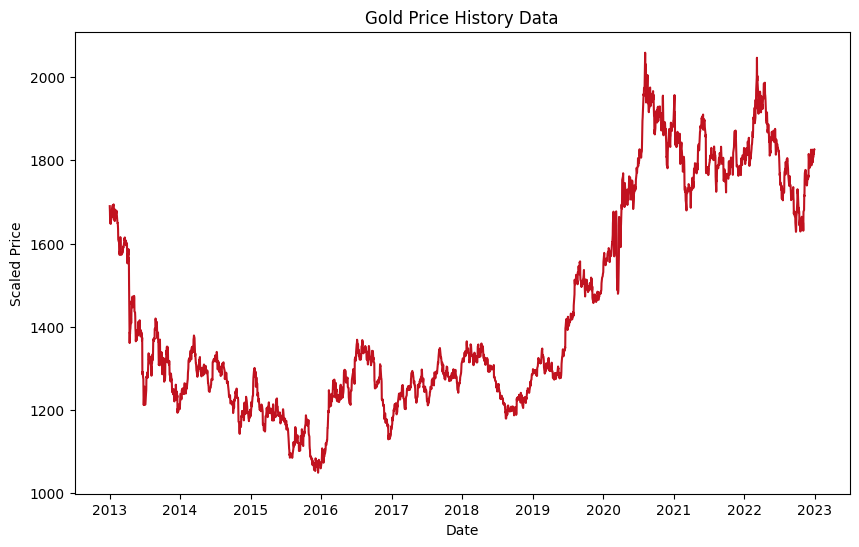

In [ ]:
plt.figure(figsize = (10, 6))

ax = sns.lineplot(data = df, x = 'Date', y = 'Price', color = palette[0])
ax.set_title('Gold Price History Data')
ax.set_ylabel('Scaled Price')
ax.set_xlabel('Date')

plt.show()

In [ ]:
test_size = df[df.Date.dt.year == 2022].shape[0]
test_size

260

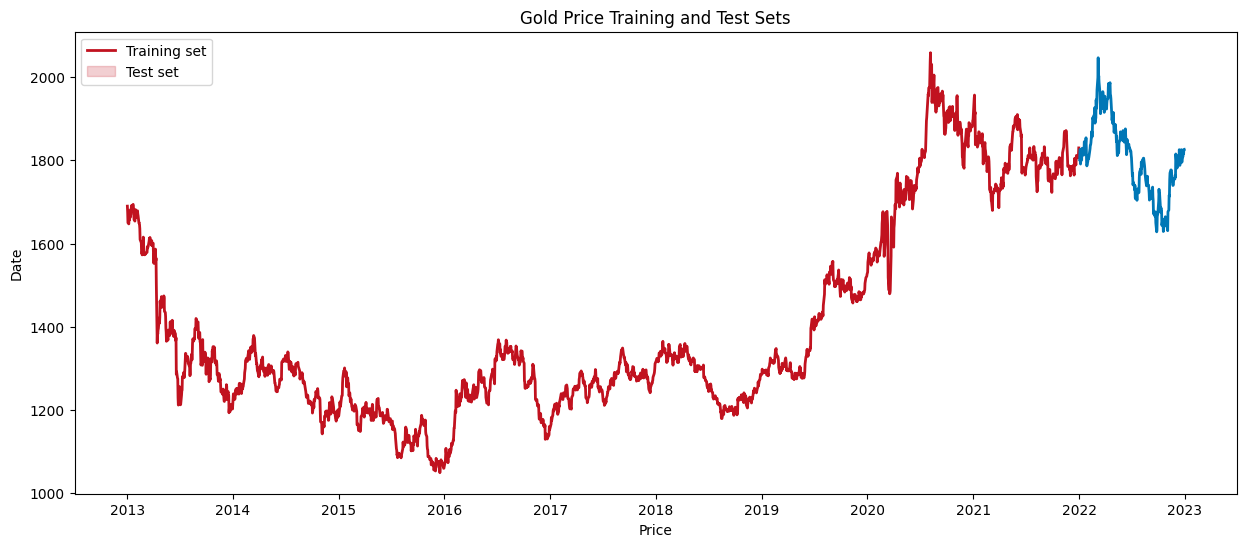

In [ ]:
plt.figure(figsize = (15, 6))

sns.lineplot(x = df.Date[:-test_size], y = df.Price[:-test_size], color = palette[0], lw = 2)
sns.lineplot(x = df.Date[-test_size:], y = df.Price[-test_size:], color = palette[1], lw = 2)

plt.title('Gold Price Training and Test Sets')
plt.xlabel('Price')
plt.ylabel('Date')
plt.legend(['Training set', 'Test set'], loc = 'upper left')

plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df.Price.values.reshape(-1, 1))

MinMaxScaler()

In [ ]:
train_data = df.Price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1, 1))

In [ ]:
len(train_data)

2323

In [ ]:
X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
len(X_train), len(y_train)

(2263, 2263)

In [ ]:
test_data = df.Price[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1, 1))

In [ ]:
X_test = []
y_test = []

for i in range(60, len(test_data)):
  X_test.append(test_data[i - 60: i, 0])
  y_test.append(test_data[i, 0])

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2263, 60, 1)
X_test shape:  (260, 60, 1)
y_train shape:  (2263, 1)
y_test shape:  (260, 1)


In [ ]:
import tensorflow as tf
import keras

input = keras.Input(shape = (60, 1))

x = keras.layers.LSTM(units = 64, return_sequences = True)(input)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.LSTM(units = 64, return_sequences = True)(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.LSTM(units = 64)(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(32, activation = 'softmax')(x)

output = keras.layers.Dense(1)(x)

model = keras.Model(inputs = input, outputs = [output])
model.compile(loss = 'mean_squared_error', optimizer = 'Nadam')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 60, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs = 150, batch_size = 32, validation_split = 0.1, verbose = 1)

Epoch 1/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - loss: 0.0938 - val_loss: 0.1221
Epoch 2/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - loss: 0.0200 - val_loss: 0.0566
Epoch 3/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - loss: 0.0112 - val_loss: 0.0280
Epoch 4/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 0.0069 - val_loss: 0.0133
Epoch 5/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.0053 - val_loss: 0.0057
Epoch 6/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 7/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 8/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 9/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - loss: 0.0019 - val_loss: 0.0037
Epoch 10/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0015 - val_loss: 0.0059
Epoch 11/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - loss: 0.0013 - val_loss: 0.0052
Epoch 12/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 10

In [ ]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 5.6895e-04
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 1 - MAPE

In [ ]:
print('Test Loss: ', result)
print('Test MAPE: ', MAPE)
print('Test Accuracy: ', accuracy)

Test Loss:  0.0006358763203024864
Test MAPE:  0.02718730331201384
Test Accuracy:  0.9728126966879862


In [ ]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

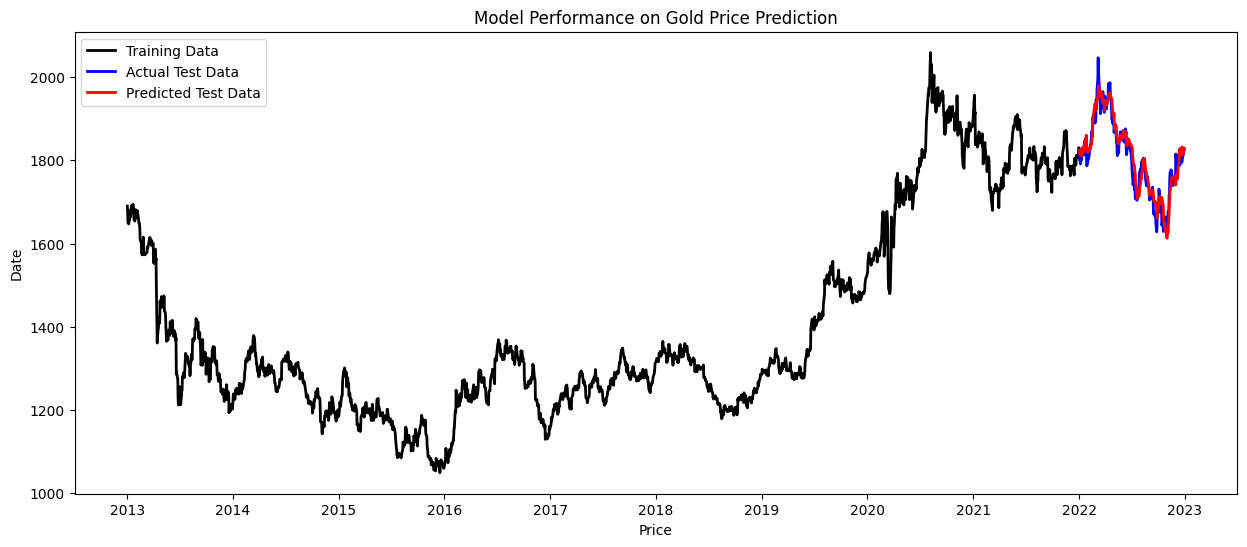

In [ ]:
plt.figure(figsize = (15, 6))

# sns.lineplot(x = df['Date'].iloc[:-test_size], y = scaler.inverse_transform(train_data), color = palette[0], lw = 2)
# sns.lineplot(x = df['Date'].iloc[-test_size:], y = y_test_true, color = palette[1], lw = 2)
# sns.lineplot(x = df['Date'].iloc[-test_size:], y = y_pred_true, color = palette[1], lw = 2)

plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)

plt.title('Model Performance on Gold Price Prediction')
plt.xlabel('Price')
plt.ylabel('Date')
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc = 'upper left')

plt.show()